In [1]:
import pandas as pd
import numpy as np


In [2]:
# Transaction sales data (1% population sample)
sales = pd.read_csv(
    "system2_case_study_transaction_data_monthly_sales_by_locationid.csv",
    parse_dates=["period_start", "period_end"]
)

# Store open / close dates (transaction location IDs)
location_info = pd.read_csv(
    "system2_case_study_transaction_data_location_info.csv",
    parse_dates=["est_open_date", "est_close_date"]
)

# Reported comparable sales through Q3-2022
reported = pd.read_excel(
    "system2_case_study_reported_numbers.xlsx"
)

# Web-scraped store location data (used for closure analysis)
web_locations = pd.read_csv(
    "system2_case_study_webscrape_data_locations.csv"
)

In [8]:
location_info.head(5)

,locationid,est_open_date,est_close_date
0,1,2017-01-01,2024-09-01
1,16,2017-01-01,2024-09-01
2,17,2017-01-01,2021-08-01
3,18,2021-05-01,2022-12-01
4,2,2017-01-01,2024-09-01


In [7]:
web_locations.head(5)

,address,as_of_date,city,phone,state,location_id,store_services,title,url,zipcode,postcode,latitude,longitude,num_services,suburban_flag
0,13477 Middlebelt Road,2024-10-07,Livonia,(734) 666-3019,Michigan,539,In-Store Shopping | In-Store Pickup | Curbside...,Livonia Commons,https://stores.partycity.com/us/mi/livonia/par...,48150,48150,42.381156,-83.335770,6,True
1,5114 28th Street SE,2024-10-07,Grand Rapids,(616) 365-5419,Michigan,4107,In-Store Shopping | In-Store Pickup | Curbside...,Waterfall Shoppes,https://stores.partycity.com/us/mi/grandrapids...,49512,49512,42.910841,-85.540782,6,True
2,2677 Oak Valley Dr,2024-10-07,Ann Arbor,(734) 519-5591,Michigan,4111,In-Store Shopping | In-Store Pickup | Curbside...,Oak Valley Plaza,https://stores.partycity.com/us/mi/annarbor/pa...,48103,48103,42.247490,-83.768959,6,True
3,3000 White Bear Avenue North,2024-10-07,Maplewood,(612) 428-0697,Minnesota,1138,In-Store Shopping | In-Store Pickup | Curbside...,Plaza 3000 Shopping Center,https://stores.partycity.com/us/mn/maplewood/p...,55109,55109,45.032238,-93.014647,6,True
4,2560 Lemay Ferry Road,2024-10-07,Saint Louis,(314) 396-2245,Missouri,5163,In-Store Shopping | In-Store Pickup | Curbside...,Lemay Plaza,https://stores.partycity.com/us/mo/saintlouis/...,63125,63125,38.518385,-90.305049,6,True


In [5]:
sales

,symbol,locationid,period_start,period_end,label,amount
0,NYSE:PRTY,1,2019-08-01,2019-08-31,2019-MS08,2128.213469
1,NYSE:PRTY,16,2019-08-01,2019-08-31,2019-MS08,676.387327
2,NYSE:PRTY,17,2019-08-01,2019-08-31,2019-MS08,770.193862
3,NYSE:PRTY,2,2019-08-01,2019-08-31,2019-MS08,2269.441296
4,NYSE:PRTY,21,2019-08-01,2019-08-31,2019-MS08,265.600689
...,...,...,...,...,...,...
38862,NYSE:PRTY,994,2023-12-01,2023-12-31,2023-MS12,987.590765
38863,NYSE:PRTY,995,2023-12-01,2023-12-31,2023-MS12,556.119912
38864,NYSE:PRTY,996,2023-12-01,2023-12-31,2023-MS12,692.716506
38865,NYSE:PRTY,997,2023-12-01,2023-12-31,2023-MS12,1011.097667


In [9]:
# Number of services offered per store
web_locations["num_services"] = (
    web_locations["store_services"]
    .fillna("")
    .str.count("\|") + 1
)

# Flag urban vs suburban (rough heuristic via ZIP length)
web_locations["suburban_flag"] = (
    web_locations["zipcode"].astype(str).str.len() == 5
)


In [10]:
web_locations.head(5)

,address,as_of_date,city,phone,state,location_id,store_services,title,url,zipcode,postcode,latitude,longitude,num_services,suburban_flag
0,13477 Middlebelt Road,2024-10-07,Livonia,(734) 666-3019,Michigan,539,In-Store Shopping | In-Store Pickup | Curbside...,Livonia Commons,https://stores.partycity.com/us/mi/livonia/par...,48150,48150,42.381156,-83.335770,6,True
1,5114 28th Street SE,2024-10-07,Grand Rapids,(616) 365-5419,Michigan,4107,In-Store Shopping | In-Store Pickup | Curbside...,Waterfall Shoppes,https://stores.partycity.com/us/mi/grandrapids...,49512,49512,42.910841,-85.540782,6,True
2,2677 Oak Valley Dr,2024-10-07,Ann Arbor,(734) 519-5591,Michigan,4111,In-Store Shopping | In-Store Pickup | Curbside...,Oak Valley Plaza,https://stores.partycity.com/us/mi/annarbor/pa...,48103,48103,42.247490,-83.768959,6,True
3,3000 White Bear Avenue North,2024-10-07,Maplewood,(612) 428-0697,Minnesota,1138,In-Store Shopping | In-Store Pickup | Curbside...,Plaza 3000 Shopping Center,https://stores.partycity.com/us/mn/maplewood/p...,55109,55109,45.032238,-93.014647,6,True
4,2560 Lemay Ferry Road,2024-10-07,Saint Louis,(314) 396-2245,Missouri,5163,In-Store Shopping | In-Store Pickup | Curbside...,Lemay Plaza,https://stores.partycity.com/us/mo/saintlouis/...,63125,63125,38.518385,-90.305049,6,True


In [11]:
web_locations["closure_risk_score"] = (
    (web_locations["num_services"] <= 3).astype(int) +
    web_locations["suburban_flag"].astype(int)
)

# Higher score = higher closure risk
high_risk_stores = web_locations.sort_values(
    "closure_risk_score",
    ascending=False
)

high_risk_stores.head()

,address,as_of_date,city,phone,state,location_id,store_services,title,url,zipcode,postcode,latitude,longitude,num_services,suburban_flag,closure_risk_score
365,2010 S.W. Westport Drive,2024-10-07,Topeka,(785) 596-6093,Kansas,1190,In-Store Shopping | Helium,South West Westport,https://stores.partycity.com/us/ks/topeka/part...,66604,66604,39.030716,-95.756562,2,True,2
64,8330 Rio San Diego Drive,2024-10-07,San Diego,(619) 210-2313,California,1239,In-Store Shopping | In-Store Pickup | Helium,Rio San Diego Plaza,https://stores.partycity.com/us/ca/sandiego/pa...,92108,92108,32.775187,-117.146604,3,True,2
654,11465 Carmel Mountain Road,2024-10-07,San Diego,(619) 763-1893,California,1241,In-Store Shopping | In-Store Pickup | Helium,Carmel Mountain Rd,https://stores.partycity.com/us/ca/sandiego/pa...,92128,92128,32.978036,-117.083886,3,True,2
91,10861 Old Halls Ferry Road,2024-10-07,Ferguson,(314) 669-8834,Missouri,412,In-Store Shopping | Helium,Central City Shopping Center,https://stores.partycity.com/us/mo/ferguson/pa...,63136,63136,38.767854,-90.262371,2,True,2
286,15242 Summit Avenue,2024-10-07,Fontana,(909) 899-2233,California,361,In-Store Shopping | Helium,Falcon Ridge Town Center,https://stores.partycity.com/us/ca/fontana/par...,92336,92336,34.152594,-117.475000,2,True,2


In [59]:
high_risk_stores['closure_risk_score'].value_counts()

closure_risk_score
1    648
0     68
2     46
Name: count, dtype: int64

In [12]:
len(high_risk_stores)

747

In [13]:
len(web_locations)

747

In [14]:
# Flag high-risk stores
web_locations["high_risk_flag"] = web_locations["closure_risk_score"] == 2

# Count stores
store_counts = web_locations["high_risk_flag"].value_counts().rename(
    index={True: "High Risk", False: "Not High Risk"}
)

store_counts

high_risk_flag
Not High Risk    706
High Risk         41
Name: count, dtype: int64

In [15]:
store_share = (
    web_locations["high_risk_flag"]
    .value_counts(normalize=True)
    .rename(index={True: "High Risk", False: "Not High Risk"})
    * 100
)

store_share

high_risk_flag
Not High Risk    94.511379
High Risk         5.488621
Name: proportion, dtype: float64

In [16]:
# Pie chart
plt.figure(figsize=(6,6))
colors = ["red", "green"]
plt.pie(risk_counts, labels=risk_counts.index, autopct="%1.1f%%", colors=colors, startangle=90)
plt.title("Party City Store Closure Risk Distribution")
plt.show()


NameError: name 'plt' is not defined

In [17]:
high_risk_stores = pd.merge(high_risk_stores,location_info, left_on='location_id', right_on='locationid', how='left')

In [18]:
high_risk_stores

,address,as_of_date,city,phone,state,location_id,store_services,title,url,zipcode,postcode,latitude,longitude,num_services,suburban_flag,closure_risk_score,locationid,est_open_date,est_close_date
0,2010 S.W. Westport Drive,2024-10-07,Topeka,(785) 596-6093,Kansas,1190,In-Store Shopping | Helium,South West Westport,https://stores.partycity.com/us/ks/topeka/part...,66604,66604,39.030716,-95.756562,2,True,2,1190.0,2019-08-01,2024-09-01
1,8330 Rio San Diego Drive,2024-10-07,San Diego,(619) 210-2313,California,1239,In-Store Shopping | In-Store Pickup | Helium,Rio San Diego Plaza,https://stores.partycity.com/us/ca/sandiego/pa...,92108,92108,32.775187,-117.146604,3,True,2,NaN,NaT,NaT
2,11465 Carmel Mountain Road,2024-10-07,San Diego,(619) 763-1893,California,1241,In-Store Shopping | In-Store Pickup | Helium,Carmel Mountain Rd,https://stores.partycity.com/us/ca/sandiego/pa...,92128,92128,32.978036,-117.083886,3,True,2,NaN,NaT,NaT
3,10861 Old Halls Ferry Road,2024-10-07,Ferguson,(314) 669-8834,Missouri,412,In-Store Shopping | Helium,Central City Shopping Center,https://stores.partycity.com/us/mo/ferguson/pa...,63136,63136,38.767854,-90.262371,2,True,2,412.0,2018-08-01,2024-09-01
4,15242 Summit Avenue,2024-10-07,Fontana,(909) 899-2233,California,361,In-Store Shopping | Helium,Falcon Ridge Town Center,https://stores.partycity.com/us/ca/fontana/par...,92336,92336,34.152594,-117.475000,2,True,2,361.0,2017-02-01,2022-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,733 State Highway 440,2024-10-07,Jersey City,(201) 984-4034,New Jersey,406,In-Store Shopping | In-Store Pickup | Curbside...,Hudson Mall,https://stores.partycity.com/us/nj/jerseycity/...,7304,7304,40.722820,-74.093025,6,False,0,406.0,2018-08-01,2024-09-01
758,3082 State Highway 35,2024-10-07,Hazlet,(732) 931-2048,New Jersey,1024,In-Store Shopping | In-Store Pickup | Curbside...,Bayshore Shopping Center,https://stores.partycity.com/us/nj/hazlet/part...,7730,7730,40.419049,-74.182299,6,False,0,1024.0,2020-08-01,2024-09-01
759,730 US-202,2024-10-07,Bridgewater,(848) 305-6013,New Jersey,747,In-Store Shopping | In-Store Pickup | Curbside...,Bridgewater Town Centre,https://stores.partycity.com/us/nj/bridgewater...,8807,8807,40.574652,-74.671080,6,False,0,747.0,2018-08-01,2024-09-01
760,231A Highland Ave,2024-10-07,Seekonk,(774) 901-2029,Massachusetts,6065,In-Store Shopping | In-Store Pickup | Curbside...,King Phillip's Crossing,https://stores.partycity.com/us/ma/seekonk/par...,2771,2771,41.797706,-71.334795,6,False,0,6065.0,2017-02-01,2024-09-01


In [ ]:
store_dates['est_open_date'] = pd.to_datetime(store_dates['est_open_date'])
store_dates['est_close_date'] = pd.to_datetime(store_dates['est_close_date'])

In [19]:
merged = pd.merge(
    high_risk_stores,
    sales,
    left_on='location_id',
    right_on='locationid',
    how='left')

In [20]:
merged.head()

,address,as_of_date,city,phone,state,location_id,store_services,title,url,zipcode,...,closure_risk_score,locationid_x,est_open_date,est_close_date,symbol,locationid_y,period_start,period_end,label,amount
0,2010 S.W. Westport Drive,2024-10-07,Topeka,(785) 596-6093,Kansas,1190,In-Store Shopping | Helium,South West Westport,https://stores.partycity.com/us/ks/topeka/part...,66604,...,2,1190.0,2019-08-01,2024-09-01,NYSE:PRTY,1190.0,2019-08-01,2019-08-31,2019-MS08,107.059513
1,2010 S.W. Westport Drive,2024-10-07,Topeka,(785) 596-6093,Kansas,1190,In-Store Shopping | Helium,South West Westport,https://stores.partycity.com/us/ks/topeka/part...,66604,...,2,1190.0,2019-08-01,2024-09-01,NYSE:PRTY,1190.0,2019-11-01,2019-11-30,2019-MS11,192.118129
2,2010 S.W. Westport Drive,2024-10-07,Topeka,(785) 596-6093,Kansas,1190,In-Store Shopping | Helium,South West Westport,https://stores.partycity.com/us/ks/topeka/part...,66604,...,2,1190.0,2019-08-01,2024-09-01,NYSE:PRTY,1190.0,2020-01-01,2020-01-31,2020-MS01,233.163934
3,2010 S.W. Westport Drive,2024-10-07,Topeka,(785) 596-6093,Kansas,1190,In-Store Shopping | Helium,South West Westport,https://stores.partycity.com/us/ks/topeka/part...,66604,...,2,1190.0,2019-08-01,2024-09-01,NYSE:PRTY,1190.0,2020-02-01,2020-02-29,2020-MS02,247.395124
4,2010 S.W. Westport Drive,2024-10-07,Topeka,(785) 596-6093,Kansas,1190,In-Store Shopping | Helium,South West Westport,https://stores.partycity.com/us/ks/topeka/part...,66604,...,2,1190.0,2019-08-01,2024-09-01,NYSE:PRTY,1190.0,2020-08-01,2020-08-31,2020-MS08,135.531877


In [21]:
merged = merged[
    (merged['period_start'] >= merged['est_open_date']) &
    (merged['period_start'] <= merged['est_close_date'])
]

In [35]:
len(merged)

32794

In [38]:
# Extract year from sales
merged['year'] = merged['period_start'].dt.year

# Aggregate total sales per store per year
yearly_sales = (
    merged.groupby(['location_id', 'title', 'year'])
          .agg({'amount':'sum', 'closure_risk_score':'max',
                'est_open_date':'first','est_close_date':'first'})
          .reset_index()
)

In [46]:
yearly_sales['closure_risk_score'].value_counts()

closure_risk_score
1    2679
0     294
2     163
Name: count, dtype: int64

In [42]:
today = pd.Timestamp.today()

yearly_sales['status'] = yearly_sales['est_close_date'].apply(
    lambda x: 'Open' if x >= today else 'Closed'
)

In [43]:
yearly_sales = yearly_sales.sort_values(['location_id','year'])

In [53]:
# Absolute change
yearly_sales['sales_change'] = yearly_sales.groupby('location_id')['amount'].diff()

# Percentage change
yearly_sales['sales_pct_change'] = yearly_sales.groupby('location_id')['amount'].pct_change() * 100

In [54]:
yearly_sales

,location_id,title,year,amount,closure_risk_score,est_open_date,est_close_date,status,sales_change,sales_pct_change,trend,likely_close_flag,closure_risk_rank
0,3,Route 10,2019,163024.016062,0,2017-01-01,2022-07-01,Closed,NaN,NaN,No change,False,3.0
1,3,Route 10,2020,210314.967817,0,2017-01-01,2022-07-01,Closed,47290.951755,29.008580,Increase,False,3.0
2,3,Route 10,2021,227107.363111,0,2017-01-01,2022-07-01,Closed,16792.395294,7.984403,Increase,False,3.0
3,3,Route 10,2022,118614.950544,0,2017-01-01,2022-07-01,Closed,-108492.412567,-47.771420,Decrease,False,3.0
4,3,Route 10,2023,71553.567382,0,2017-04-01,2024-09-01,Closed,-47061.383162,-39.675760,Decrease,False,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,6071,Buckland Hills Plaza,2019,2598.396011,0,2017-03-01,2024-09-01,Closed,NaN,NaN,No change,False,3.0
3132,6071,Buckland Hills Plaza,2020,7694.723380,0,2017-03-01,2024-09-01,Closed,5096.327370,196.133590,Increase,False,3.0
3133,6071,Buckland Hills Plaza,2021,6375.438220,0,2017-03-01,2024-09-01,Closed,-1319.285161,-17.145323,Decrease,False,3.0
3134,6071,Buckland Hills Plaza,2022,15578.581432,0,2017-03-01,2024-09-01,Closed,9203.143213,144.353108,Increase,False,3.0


In [55]:
yearly_sales['trend'] = yearly_sales['sales_change'].apply(
    lambda x: 'Increase' if x > 0 else ('Decrease' if x < 0 else 'No change')
)

In [56]:
yearly_sales

,location_id,title,year,amount,closure_risk_score,est_open_date,est_close_date,status,sales_change,sales_pct_change,trend,likely_close_flag,closure_risk_rank
0,3,Route 10,2019,163024.016062,0,2017-01-01,2022-07-01,Closed,NaN,NaN,No change,False,3.0
1,3,Route 10,2020,210314.967817,0,2017-01-01,2022-07-01,Closed,47290.951755,29.008580,Increase,False,3.0
2,3,Route 10,2021,227107.363111,0,2017-01-01,2022-07-01,Closed,16792.395294,7.984403,Increase,False,3.0
3,3,Route 10,2022,118614.950544,0,2017-01-01,2022-07-01,Closed,-108492.412567,-47.771420,Decrease,False,3.0
4,3,Route 10,2023,71553.567382,0,2017-04-01,2024-09-01,Closed,-47061.383162,-39.675760,Decrease,False,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,6071,Buckland Hills Plaza,2019,2598.396011,0,2017-03-01,2024-09-01,Closed,NaN,NaN,No change,False,3.0
3132,6071,Buckland Hills Plaza,2020,7694.723380,0,2017-03-01,2024-09-01,Closed,5096.327370,196.133590,Increase,False,3.0
3133,6071,Buckland Hills Plaza,2021,6375.438220,0,2017-03-01,2024-09-01,Closed,-1319.285161,-17.145323,Decrease,False,3.0
3134,6071,Buckland Hills Plaza,2022,15578.581432,0,2017-03-01,2024-09-01,Closed,9203.143213,144.353108,Increase,False,3.0


In [57]:
yearly_sales['closure_risk_score'].value_counts()

closure_risk_score
1    2679
0     294
2     163
Name: count, dtype: int64

In [52]:

# Predict likely closure

# Simple heuristic: high closure risk + declining sales = likely closure
yearly_sales['likely_close_flag'] = np.where(
    (yearly_sales['closure_risk_score'] >= 2) & (yearly_sales['trend'] == 'Decrease'),
    True,
    False
)

# rank risk by closure
yearly_sales['closure_risk_rank'] = yearly_sales.groupby('year')['closure_risk_score'].rank(method='dense', ascending=False)

# Final columns
final_cols = [
    'location_id','title','year','amount','status',
    'sales_change','sales_pct_change','trend',
    'closure_risk_score','likely_close_flag','closure_risk_rank'
]
yearly_sales_final = yearly_sales[final_cols]

# View final output
yearly_sales_final.head(20)

,location_id,title,year,amount,status,sales_change,sales_pct_change,trend,closure_risk_score,likely_close_flag,closure_risk_rank
0,3,Route 10,2019,163024.016062,Closed,NaN,NaN,No change,0,False,3.0
1,3,Route 10,2020,210314.967817,Closed,47290.951755,29.008580,Increase,0,False,3.0
2,3,Route 10,2021,227107.363111,Closed,16792.395294,7.984403,Increase,0,False,3.0
3,3,Route 10,2022,118614.950544,Closed,-108492.412567,-47.771420,Decrease,0,False,3.0
4,3,Route 10,2023,71553.567382,Closed,-47061.383162,-39.675760,Decrease,0,False,3.0
5,4,Brentwood Plaza Shopping Center,2019,33944.342671,Closed,NaN,NaN,No change,0,False,3.0
6,4,Brentwood Plaza Shopping Center,2020,59450.374044,Closed,25506.031373,75.140743,Increase,0,False,3.0
7,4,Brentwood Plaza Shopping Center,2021,96269.692530,Closed,36819.318486,61.932863,Increase,0,False,3.0
8,4,Brentwood Plaza Shopping Center,2022,62378.696365,Closed,-33890.996164,-35.204222,Decrease,0,False,3.0
9,4,Brentwood Plaza Shopping Center,2023,46428.794948,Closed,-15949.901418,-25.569469,Decrease,0,False,3.0


In [58]:
# Select the relevant columns from high_risk_stores
risk_info = high_risk_stores[['location_id','num_services','suburban_flag']].drop_duplicates('location_id')

# Merge with your yearly_sales_final
yearly_sales_final = yearly_sales_final.merge(
    risk_info,
    on='location_id',
    how='left'
)

# Optional: reorder columns for clarity
final_cols = [
    'location_id','title','year','amount','status','sales_change','sales_pct_change','trend',
    'closure_risk_score','num_services','suburban_flag','likely_close_flag','closure_risk_rank'
]

yearly_sales_final = yearly_sales_final[final_cols]

# View final result
yearly_sales_final.head(20)

,location_id,title,year,amount,status,sales_change,sales_pct_change,trend,closure_risk_score,num_services,suburban_flag,likely_close_flag,closure_risk_rank
0,3,Route 10,2019,163024.016062,Closed,NaN,NaN,No change,0,6,False,False,3.0
1,3,Route 10,2020,210314.967817,Closed,47290.951755,29.008580,Increase,0,6,False,False,3.0
2,3,Route 10,2021,227107.363111,Closed,16792.395294,7.984403,Increase,0,6,False,False,3.0
3,3,Route 10,2022,118614.950544,Closed,-108492.412567,-47.771420,Decrease,0,6,False,False,3.0
4,3,Route 10,2023,71553.567382,Closed,-47061.383162,-39.675760,Decrease,0,6,False,False,3.0
5,4,Brentwood Plaza Shopping Center,2019,33944.342671,Closed,NaN,NaN,No change,0,7,False,False,3.0
6,4,Brentwood Plaza Shopping Center,2020,59450.374044,Closed,25506.031373,75.140743,Increase,0,7,False,False,3.0
7,4,Brentwood Plaza Shopping Center,2021,96269.692530,Closed,36819.318486,61.932863,Increase,0,7,False,False,3.0
8,4,Brentwood Plaza Shopping Center,2022,62378.696365,Closed,-33890.996164,-35.204222,Decrease,0,7,False,False,3.0
9,4,Brentwood Plaza Shopping Center,2023,46428.794948,Closed,-15949.901418,-25.569469,Decrease,0,7,False,False,3.0


In [60]:
yearly_sales_final['likely_close_flag'].value_counts()

likely_close_flag
False    3092
True       44
Name: count, dtype: int64

In [61]:
def generate_closure_reason(row):
    reasons = []

    # Risk score drivers
    if row['num_services'] <= 2:
        reasons.append("Limited in-store services")
    elif row['num_services'] == 3:
        reasons.append("Moderate service offering")

    if row['suburban_flag']:
        reasons.append("Suburban location")

    # Sales performance
    if row['trend'] == 'Decrease':
        reasons.append("Declining sales trend")
    elif row['trend'] == 'Increase':
        reasons.append("Sales growth offsetting risk")

    # Final logic
    if row['likely_close_flag']:
        return " | ".join(reasons)
    else:
        return "Stable performance despite risk factors"

In [67]:
yearly_sales_final['closure_reason'] = yearly_sales_final.apply(
    generate_closure_reason,
    axis=1
)

In [68]:
final_cols = [
    'location_id','title','year','amount',
    'sales_pct_change','trend',
    'closure_risk_score','num_services','suburban_flag',
    'likely_close_flag','closure_risk_rank',
    'closure_reason'
]

In [69]:
yearly_sales_final = yearly_sales_final[final_cols]

In [72]:
likely_to_close = yearly_sales_final[
    yearly_sales_final['likely_close_flag'] == True
]

In [74]:
pd.set_option('display.max_colwidth', None)

In [87]:
likely_to_close

,location_id,title,year,amount,sales_pct_change,trend,closure_risk_score,num_services,suburban_flag,likely_close_flag,closure_risk_rank,closure_reason
39,24,San Pedro Square,2023,7666.893711,-41.152823,Decrease,2,2,True,True,1.0,Limited in-store services | Suburban location | Declining sales trend
103,118,Waikele Center,2022,187493.319576,-44.516813,Decrease,2,1,True,True,1.0,Limited in-store services | Suburban location | Declining sales trend
104,118,Waikele Center,2023,90764.750027,-51.590409,Decrease,2,1,True,True,1.0,Limited in-store services | Suburban location | Declining sales trend
106,125,North Regency Square,2020,1453.295086,-25.247963,Decrease,2,2,True,True,1.0,Limited in-store services | Suburban location | Declining sales trend
148,164,Oceangate Commerce Center,2022,14145.151919,-13.311568,Decrease,2,2,True,True,1.0,Limited in-store services | Suburban location | Declining sales trend
176,175,Deerbrook Marketplace,2021,22107.247229,-3.593606,Decrease,2,3,True,True,1.0,Moderate service offering | Suburban location | Declining sales trend
178,175,Deerbrook Marketplace,2023,22294.505612,-30.895247,Decrease,2,3,True,True,1.0,Moderate service offering | Suburban location | Declining sales trend
190,187,Ventura Blvd,2020,23901.498853,-11.040106,Decrease,2,2,True,True,1.0,Limited in-store services | Suburban location | Declining sales trend
193,187,Ventura Blvd,2023,46641.600650,-13.739440,Decrease,2,2,True,True,1.0,Limited in-store services | Suburban location | Declining sales trend
212,197,Danada Square West Mall,2022,13503.316803,-41.315544,Decrease,2,2,True,True,1.0,Limited in-store services | Suburban location | Declining sales trend


In [76]:
latest_year = (
    yearly_sales_final
    .sort_values('year')
    .groupby('location_id')
    .tail(1)
)

In [77]:
latest_year

,location_id,title,year,amount,sales_pct_change,trend,closure_risk_score,num_services,suburban_flag,likely_close_flag,closure_risk_rank,closure_reason
148,164,Oceangate Commerce Center,2022,14145.151919,-13.311568,Decrease,2,2,True,True,1.0,Limited in-store services | Suburban location | Declining sales trend
477,386,Northwest Promnade,2022,56710.991806,-31.581263,Decrease,2,2,True,True,1.0,Limited in-store services | Suburban location | Declining sales trend
443,361,Falcon Ridge Town Center,2022,17153.983624,-16.246444,Decrease,2,2,True,True,1.0,Limited in-store services | Suburban location | Declining sales trend
414,339,Mohawk Commons,2022,1305.159109,-40.411772,Decrease,2,1,True,True,1.0,Limited in-store services | Suburban location | Declining sales trend
307,291,Stockdale Village Shopping Center,2022,138781.439626,-28.457004,Decrease,2,2,True,True,1.0,Limited in-store services | Suburban location | Declining sales trend
...,...,...,...,...,...,...,...,...,...,...,...,...
1787,931,Fairfield Town Center,2023,19566.076391,30.155148,Increase,1,6,True,False,2.0,Stable performance despite risk factors
1792,932,Otter Creek Shopping Center,2023,22506.080548,-13.207027,Decrease,1,6,True,False,2.0,Stable performance despite risk factors
1797,936,N Rock Rd,2023,12378.821690,50.602058,Increase,1,6,True,False,2.0,Stable performance despite risk factors
1807,938,Overland Pointe Marketplace,2023,23780.183784,1.990735,Increase,1,8,True,False,2.0,Stable performance despite risk factors


In [88]:
likely_to_close = likely_to_close[['location_id','title','closure_reason']]

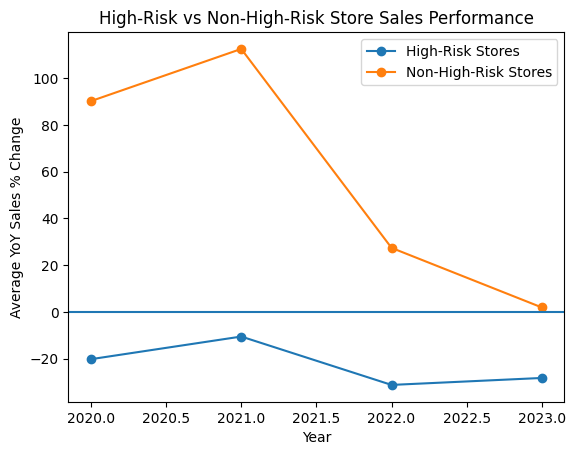

In [81]:
import matplotlib.pyplot as plt

# Remove rows without YoY change
plot_df = yearly_sales_final.dropna(subset=['sales_pct_change'])

# Aggregate average YoY % change by year and risk group
risk_perf = (
    plot_df
    .groupby(['year', 'likely_close_flag'])['sales_pct_change']
    .mean()
    .reset_index()
)

high_risk = risk_perf[risk_perf['likely_close_flag'] == True]
non_risk  = risk_perf[risk_perf['likely_close_flag'] == False]

plt.figure()
plt.plot(high_risk['year'], high_risk['sales_pct_change'], marker='o', label='High-Risk Stores')
plt.plot(non_risk['year'], non_risk['sales_pct_change'], marker='o', label='Non-High-Risk Stores')
plt.axhline(0)

plt.xlabel('Year')
plt.ylabel('Average YoY Sales % Change')
plt.title('High-Risk vs Non-High-Risk Store Sales Performance')
plt.legend()
plt.show()

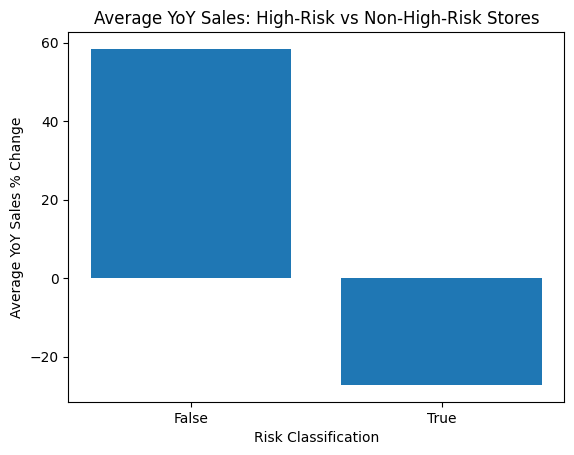

In [82]:
summary = (
    plot_df
    .groupby('likely_close_flag')['sales_pct_change']
    .mean()
    .reset_index()
)

plt.figure()
plt.bar(
    summary['likely_close_flag'].astype(str),
    summary['sales_pct_change']
)

plt.xlabel('Risk Classification')
plt.ylabel('Average YoY Sales % Change')
plt.title('Average YoY Sales: High-Risk vs Non-High-Risk Stores')
plt.show()

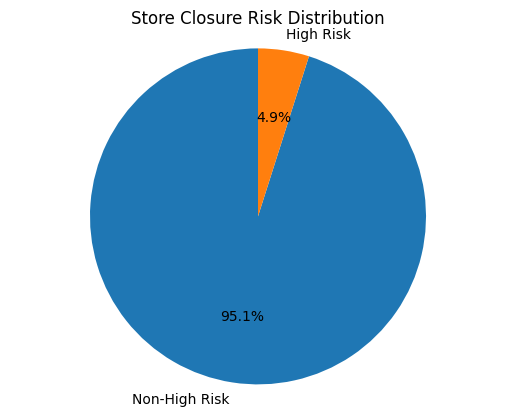

In [83]:
# One row per store (use max risk flag across years)
store_risk = (
    yearly_sales_final
    .groupby('location_id')['likely_close_flag']
    .max()
    .value_counts()
)

labels = ['Non-High Risk', 'High Risk']
sizes = [
    store_risk.get(False, 0),
    store_risk.get(True, 0)
]

plt.figure()
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Store Closure Risk Distribution')
plt.axis('equal')  # Makes it a circle
plt.show()

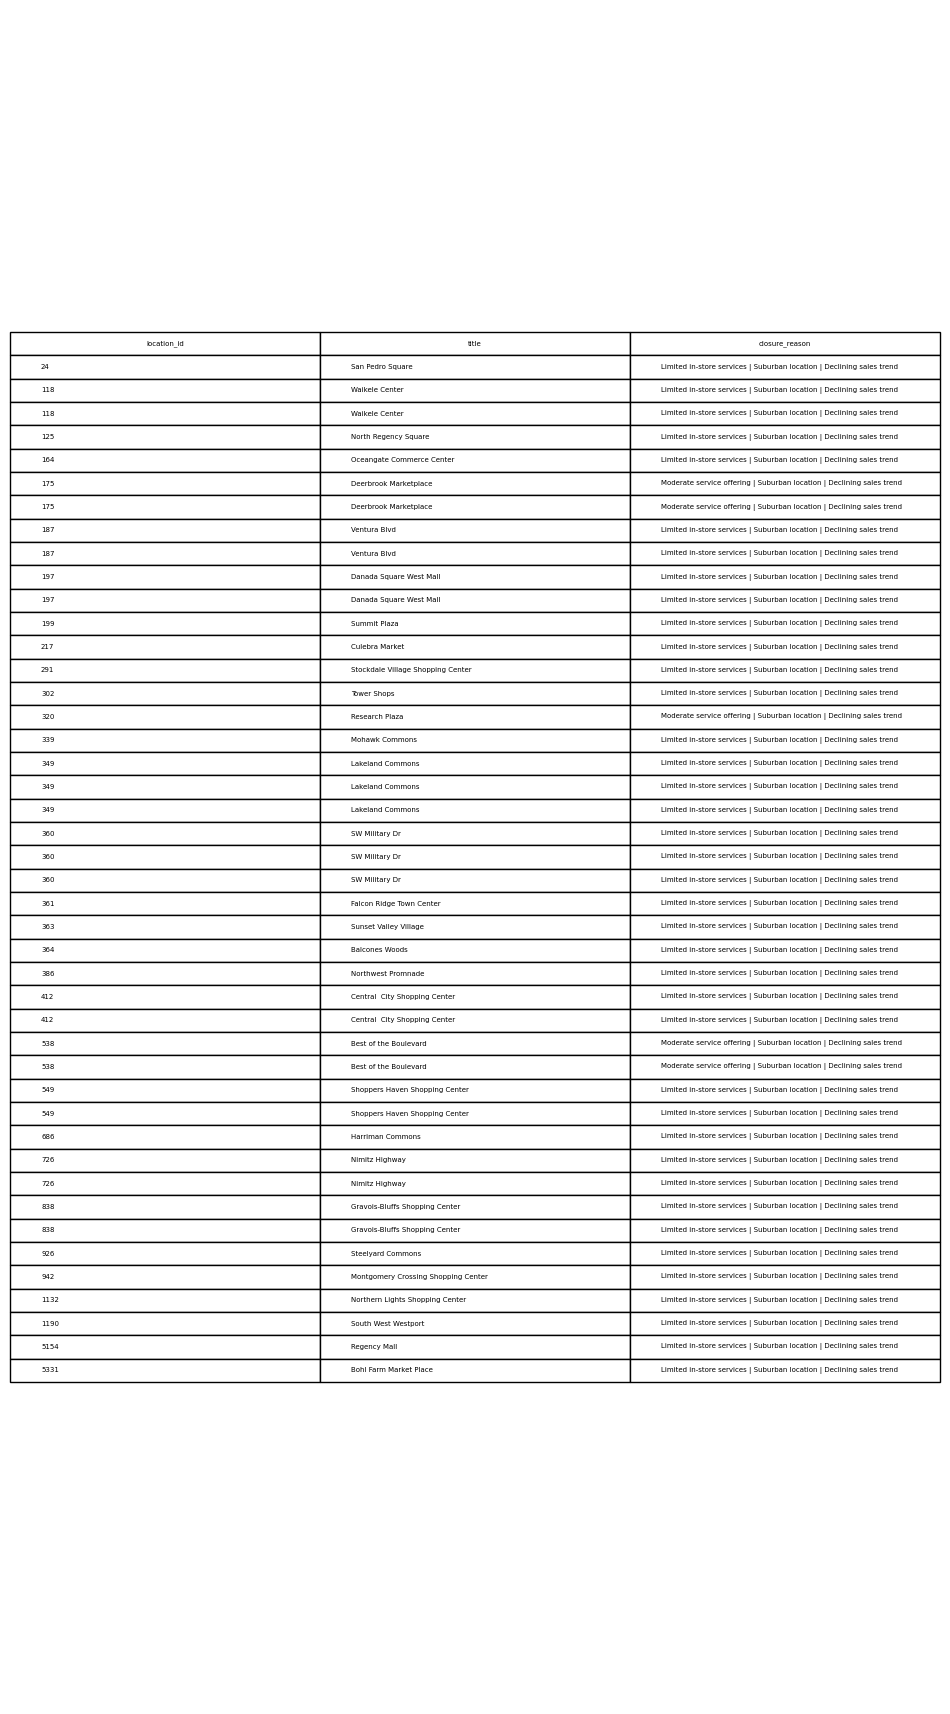

In [100]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 0.5 * len(likely_to_close)))
ax.axis("off")

table = ax.table(
    cellText=likely_to_close.values,
    colLabels=likely_to_close.columns,
    loc="center",
    cellLoc="left"
)

table.auto_set_font_size(False)
table.set_fontsize(5)
table.scale(1, 1.4)

plt.savefig("party_city_likely_store_closures.png", bbox_inches="tight")
plt.show()